# Classificação: aprendendo a classificar dados com Machine Learning

## Análise exploratória

### Fazendo a leitura dos dados

In [1]:
import pandas as pd

In [2]:
dados = pd.read_csv('https://raw.githubusercontent.com/mateusopaiva/classificacao-machine-learnig/main/marketing_investimento.csv')

In [3]:
dados

,idade,estado_civil,escolaridade,inadimplencia,saldo,fez_emprestimo,tempo_ult_contato,numero_contatos,aderencia_investimento
0,45,casado (a),superior,nao,242,nao,587,1,sim
1,42,casado (a),medio,nao,1289,nao,250,4,sim
2,23,solteiro (a),superior,nao,363,nao,16,18,nao
3,58,divorciado (a),superior,nao,1382,nao,700,1,sim
4,50,casado (a),medio,nao,3357,nao,239,4,sim
...,...,...,...,...,...,...,...,...,...
1263,52,solteiro (a),superior,nao,83,nao,1223,6,sim
1264,35,solteiro (a),superior,nao,5958,nao,215,1,sim
1265,30,solteiro (a),superior,nao,-477,sim,1532,2,sim
1266,42,casado (a),superior,nao,2187,nao,525,3,sim


In [4]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1268 entries, 0 to 1267
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   idade                   1268 non-null   int64 
 1   estado_civil            1268 non-null   object
 2   escolaridade            1268 non-null   object
 3   inadimplencia           1268 non-null   object
 4   saldo                   1268 non-null   int64 
 5   fez_emprestimo          1268 non-null   object
 6   tempo_ult_contato       1268 non-null   int64 
 7   numero_contatos         1268 non-null   int64 
 8   aderencia_investimento  1268 non-null   object
dtypes: int64(4), object(5)
memory usage: 89.3+ KB


### Explorando variáveis categóricas

In [5]:
import plotly.express as px

In [6]:
px.histogram(dados, x='aderencia_investimento', text_auto=True)

In [7]:
px.histogram(dados, x='estado_civil', text_auto=True, color = 'aderencia_investimento', barmode='group')

In [8]:
px.histogram(dados, x='escolaridade', text_auto=True, color = 'aderencia_investimento', barmode='group')

In [9]:
px.histogram(dados, x='inadimplencia', text_auto=True, color = 'aderencia_investimento', barmode='group')

In [10]:
px.histogram(dados, x='fez_emprestimo', text_auto=True, color = 'aderencia_investimento', barmode='group')

### Explorando variáveis numéricas

In [11]:
px.box(dados, x='idade', color='aderencia_investimento')

In [12]:
px.box(dados, x='saldo', color='aderencia_investimento')

In [13]:
px.box(dados, x='tempo_ult_contato', color='aderencia_investimento')

In [14]:
px.box(dados, x='numero_contatos', color='aderencia_investimento')

## Transformação de dados


### Separação de variáveis

In [15]:
dados

,idade,estado_civil,escolaridade,inadimplencia,saldo,fez_emprestimo,tempo_ult_contato,numero_contatos,aderencia_investimento
0,45,casado (a),superior,nao,242,nao,587,1,sim
1,42,casado (a),medio,nao,1289,nao,250,4,sim
2,23,solteiro (a),superior,nao,363,nao,16,18,nao
3,58,divorciado (a),superior,nao,1382,nao,700,1,sim
4,50,casado (a),medio,nao,3357,nao,239,4,sim
...,...,...,...,...,...,...,...,...,...
1263,52,solteiro (a),superior,nao,83,nao,1223,6,sim
1264,35,solteiro (a),superior,nao,5958,nao,215,1,sim
1265,30,solteiro (a),superior,nao,-477,sim,1532,2,sim
1266,42,casado (a),superior,nao,2187,nao,525,3,sim


In [16]:
x = dados.drop('aderencia_investimento', axis=1)
y = dados['aderencia_investimento']

In [17]:
x

,idade,estado_civil,escolaridade,inadimplencia,saldo,fez_emprestimo,tempo_ult_contato,numero_contatos
0,45,casado (a),superior,nao,242,nao,587,1
1,42,casado (a),medio,nao,1289,nao,250,4
2,23,solteiro (a),superior,nao,363,nao,16,18
3,58,divorciado (a),superior,nao,1382,nao,700,1
4,50,casado (a),medio,nao,3357,nao,239,4
...,...,...,...,...,...,...,...,...
1263,52,solteiro (a),superior,nao,83,nao,1223,6
1264,35,solteiro (a),superior,nao,5958,nao,215,1
1265,30,solteiro (a),superior,nao,-477,sim,1532,2
1266,42,casado (a),superior,nao,2187,nao,525,3


In [18]:
y

0       sim
1       sim
2       nao
3       sim
4       sim
       ... 
1263    sim
1264    sim
1265    sim
1266    sim
1267    sim
Name: aderencia_investimento, Length: 1268, dtype: object

### Transformando variáveis explicativas

In [19]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [20]:
colunas = x.columns

In [21]:
one_hot = make_column_transformer((
    OneHotEncoder(drop = 'if_binary'),
    ['estado_civil', 'escolaridade', 'inadimplencia', 'fez_emprestimo']
),
    remainder = 'passthrough',
    sparse_threshold=0)

In [22]:
x = one_hot.fit_transform(x)

In [24]:
one_hot.get_feature_names_out(colunas)

array(['onehotencoder__estado_civil_casado (a)',
       'onehotencoder__estado_civil_divorciado (a)',
       'onehotencoder__estado_civil_solteiro (a)',
       'onehotencoder__escolaridade_fundamental',
       'onehotencoder__escolaridade_medio',
       'onehotencoder__escolaridade_superior',
       'onehotencoder__inadimplencia_sim',
       'onehotencoder__fez_emprestimo_sim', 'remainder__idade',
       'remainder__saldo', 'remainder__tempo_ult_contato',
       'remainder__numero_contatos'], dtype=object)

In [25]:
pd.DataFrame(x, columns = one_hot.get_feature_names_out(colunas))

,onehotencoder__estado_civil_casado (a),onehotencoder__estado_civil_divorciado (a),onehotencoder__estado_civil_solteiro (a),onehotencoder__escolaridade_fundamental,onehotencoder__escolaridade_medio,onehotencoder__escolaridade_superior,onehotencoder__inadimplencia_sim,onehotencoder__fez_emprestimo_sim,remainder__idade,remainder__saldo,remainder__tempo_ult_contato,remainder__numero_contatos
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,45.0,242.0,587.0,1.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,42.0,1289.0,250.0,4.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,23.0,363.0,16.0,18.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,58.0,1382.0,700.0,1.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,50.0,3357.0,239.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1263,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,52.0,83.0,1223.0,6.0
1264,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,35.0,5958.0,215.0,1.0
1265,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,30.0,-477.0,1532.0,2.0
1266,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,42.0,2187.0,525.0,3.0


### Transformando em variável alvo

In [26]:
from sklearn.preprocessing import LabelEncoder

In [27]:
label_encoder = LabelEncoder()

In [28]:
y = label_encoder.fit_transform(y)

In [29]:
y

array([1, 1, 0, ..., 1, 1, 1])

## Ajustando modelos

### Divisão de treino e teste

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, stratify = y, random_state= 5)

### Ajustando modelos

In [32]:
from sklearn.dummy import DummyClassifier

In [33]:
dummy = DummyClassifier()
dummy.fit(x_treino, y_treino)

dummy.score(x_teste, y_teste)

0.6025236593059937

### Árvore de decisão

In [34]:
from sklearn.tree import DecisionTreeClassifier

In [35]:
arvore = DecisionTreeClassifier(random_state= 5)
arvore.fit(x_treino, y_treino)

DecisionTreeClassifier(random_state=5)

In [36]:
arvore.predict(x_teste)

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,

In [37]:
arvore.score(x_teste, y_teste)

0.6656151419558359

In [38]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [39]:
nome_colunas = ['casado (a)',
                'divorciado (a)',
                'solteiro (a)',
                'fundamental',
                'medio',
                'superior',
                'inadimplencia',
                'fez_emprestimo',
                'idade',
                'saldo',
                'tempo_ult_contato',
                'numero_contatos']

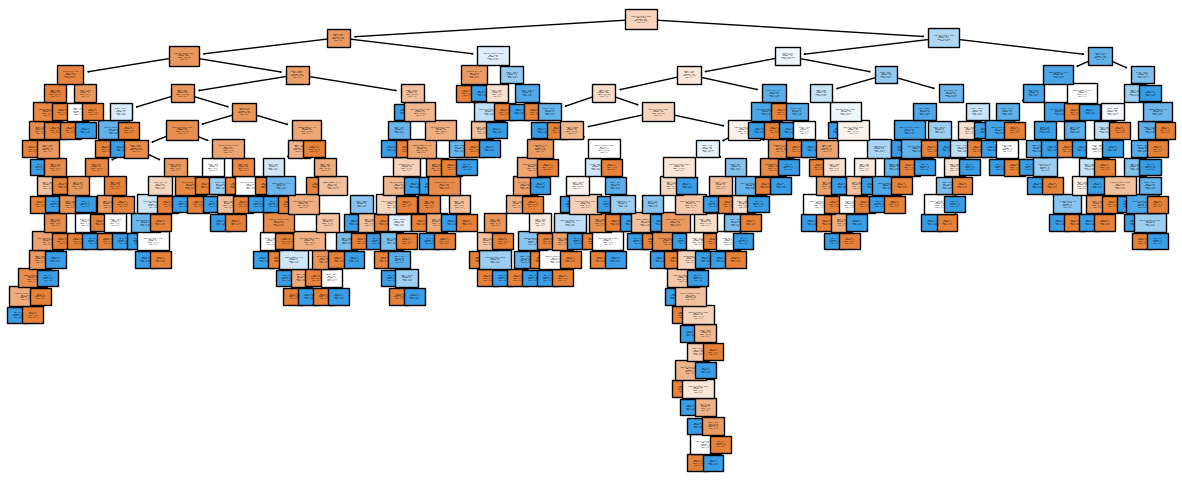

In [41]:
plt.figure(figsize = (15, 6))
plot_tree(arvore, filled = True, class_names = ['não', 'sim'], fontsize = 1, feature_names = nome_colunas);

In [43]:
arvore.score(x_treino, y_treino)

1.0

In [44]:
arvore = DecisionTreeClassifier(max_depth = 3, random_state= 5)
arvore.fit(x_treino, y_treino)

DecisionTreeClassifier(max_depth=3, random_state=5)

In [45]:
arvore.score(x_treino, y_treino)

0.7613038906414301

In [46]:
arvore.score(x_teste, y_teste)

0.7160883280757098

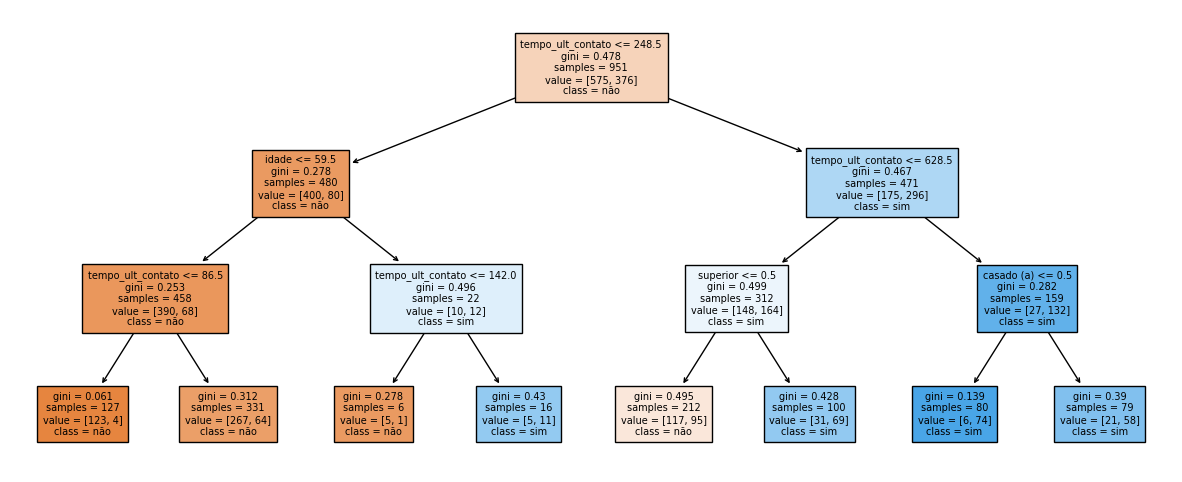

In [48]:
plt.figure(figsize = (15, 6))
plot_tree(arvore, filled = True, class_names = ['não', 'sim'], fontsize = 7, feature_names = nome_colunas);